# Multiple Regression

I will be performing statistical analyses from the data of basketball teams for the years of 1995-2015 and come out with a regression model that will predict the total number of wins for a team in the regular season based on key performance metrics.


# Data Preparation

In [45]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# dataframe for this project
nba_wins_df = pd.read_csv('nba_wins_data.csv')
display(HTML(nba_wins_df.head().to_html()))
print("The table above is the first five rows of the data set.")
print("Number of rows in the dataset =", len(nba_wins_df))

,year_id,fran_id,avg_pts,avg_opp_pts,avg_elo_n,avg_opp_elo_n,avg_pts_differential,avg_elo_differential,total_wins
0,1995,Bucks,99.341463,103.707317,1368.604789,1497.311587,-4.365854,-128.706798,34
1,1995,Bulls,101.524390,96.695122,1569.892129,1488.199352,4.829268,81.692777,47
2,1995,Cavaliers,90.451220,89.829268,1542.433391,1498.848261,0.621951,43.585130,43
3,1995,Celtics,102.780488,104.658537,1431.307532,1495.936224,-1.878049,-64.628693,35
4,1995,Clippers,96.670732,105.829268,1309.053701,1517.260260,-9.158537,-208.206558,17


The table above is the first five rows of the data set.
Number of rows in the dataset = 618


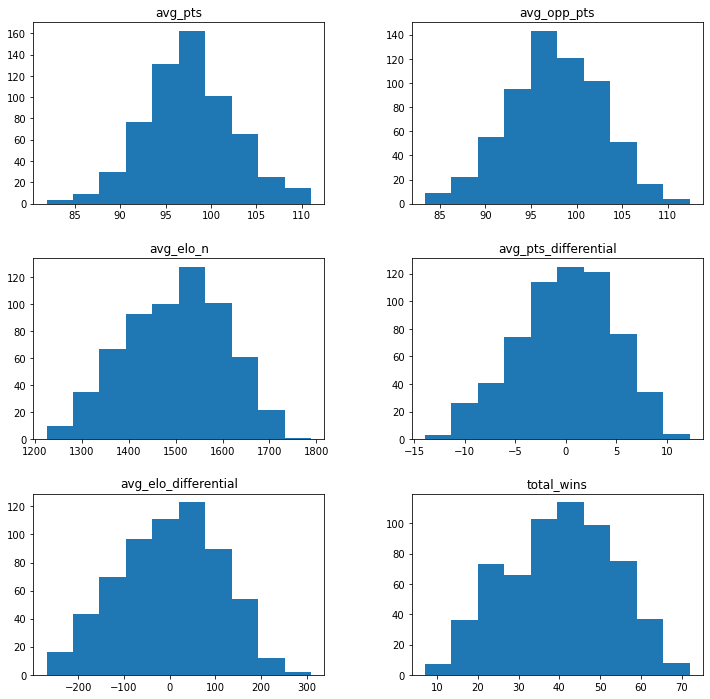

In [80]:
_ = nba_wins_df.hist(column=['avg_pts','avg_opp_pts','avg_elo_n','avg_pts_differential',
                'avg_elo_differential','total_wins'],figsize=(12,12), grid = False)

From the above distributions, we can see that they are not skewed and they follow a normal distribution

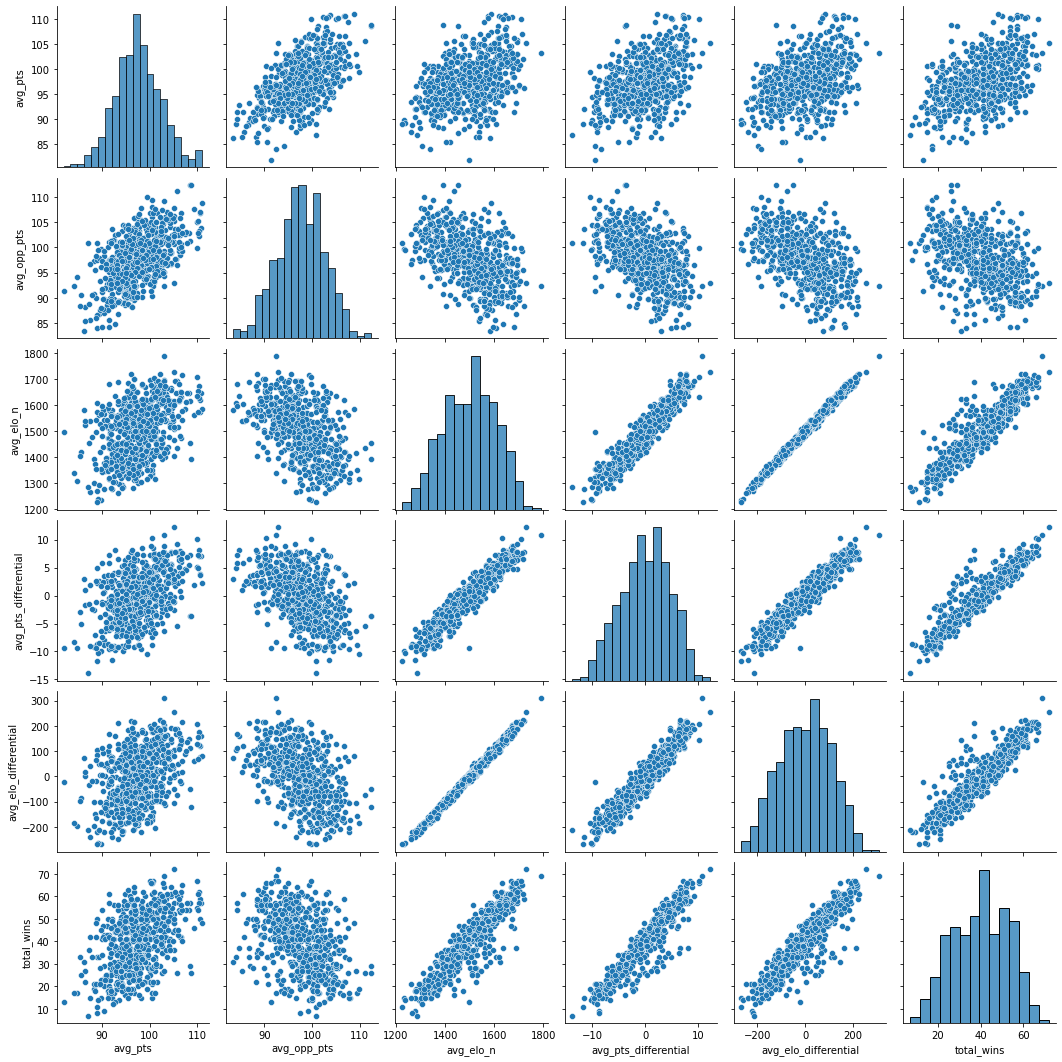

In [87]:
import seaborn as sns
df = pd.read_csv('nba_wins_data.csv', usecols = ['avg_pts','avg_opp_pts','avg_elo_n','avg_pts_differential',
                'avg_elo_differential','total_wins'])
_ = sns.pairplot(df)

In [75]:
corr = df.corr()
corr.style.set_precision(3).background_gradient(cmap="RdBu", vmin = -1, vmax = 1)

,avg_pts,avg_opp_pts,avg_elo_n,avg_pts_differential,avg_elo_differential,total_wins
avg_pts,1.000,0.564,0.407,0.439,0.398,0.478
avg_opp_pts,0.564,1.000,-0.476,-0.494,-0.491,-0.391
avg_elo_n,0.407,-0.476,1.000,0.946,0.995,0.907
avg_pts_differential,0.439,-0.494,0.946,1.000,0.952,0.928
avg_elo_differential,0.398,-0.491,0.995,0.952,1.000,0.913
total_wins,0.478,-0.391,0.907,0.928,0.913,1.000


# Scatterplot and Correlation for Total Number of Wins and Average Points Scored

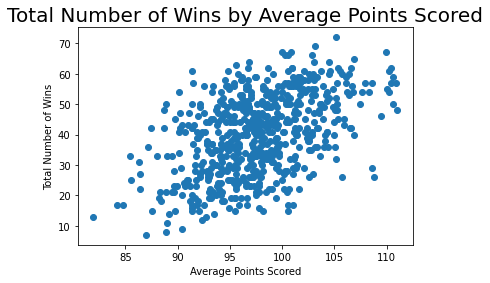

Correlation between Average Points Scored and the Total Number of Wins 
Pearson Correlation Coefficient = 0.478
P-value = 0.0


In [76]:
import scipy.stats as st

plt.plot(nba_wins_df['avg_pts'], nba_wins_df['total_wins'], 'o')
plt.title('Total Number of Wins by Average Points Scored', fontsize=20)
plt.xlabel('Average Points Scored')
plt.ylabel('Total Number of Wins')
plt.show()

correlation_coefficient, p_value = st.pearsonr(nba_wins_df['avg_pts'], nba_wins_df['total_wins'])

print("Correlation between Average Points Scored and the Total Number of Wins ")
print("Pearson Correlation Coefficient =",  round(correlation_coefficient,3))
print("P-value =", round(p_value,3))

# Simple Linear Regression: Predicting the Total Number of Wins using Average Points Scored

In [91]:
import statsmodels.formula.api as smf

# Simple Linear Regression
# ---- TODO: make your edits here ---
model1 = smf.ols('total_wins ~ avg_pts', nba_wins_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:             total_wins   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     182.1
Date:                Wed, 27 Apr 2022   Prob (F-statistic):           1.52e-36
Time:                        20:59:55   Log-Likelihood:                -2385.4
No. Observations:                 618   AIC:                             4775.
Df Residuals:                     616   BIC:                             4784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -85.5476      9.305     -9.194      0.0

The simple linear regression model for predicting the total number of wins using only the average points scored is: 
<br> <mark style="background-color: #FFFF00">$Y=1.2859X-85.5476$ </mark>
<br> $Y$: Total Number of Wins <br> 
$X$: Average Points Scored



# Multiple Regression: Predicting the Total Number of Wins using Average Points Scored, Average Relative Skill, and Average Points Differential

In [90]:
import numpy as np 
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.display import display, HTML

nba_wins_df = pd.read_csv('nba_wins_data.csv')

model3 = smf.ols('total_wins ~ avg_pts + avg_elo_n + avg_pts_differential' , nba_wins_df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:             total_wins   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1449.
Date:                Wed, 27 Apr 2022   Prob (F-statistic):          5.03e-278
Time:                        00:04:32   Log-Likelihood:                -1819.8
No. Observations:                 618   AIC:                             3648.
Df Residuals:                     614   BIC:                             3665.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -35.8921 

The Multiple regression model is given by:   <mark style="background-color: #FFFF00">  $Y = -35.8921 + 0.2406X_1 + 0.0348X_2 + 1.7621X_3 $ </mark>
<br> $X_1$: average points <br>
$X_2$: average relative skill<br>
$X_3$: average points differential